# 5. Time series mesoderm
When informative time-series sampling points are available, they can prove useful in guiding the graph construction and elucidating downstream analysis.

This example uses a mouse embryonic stem cell (mESC) differentiation time course collected with mass cytometry. This particularly example looks at the cells cultured in conditions favouring differentiation into the mesoderm lineage. Samples are collected over an 11 day period. 

### Load the data

The dataset consists of 89782 cells comprising ~ 7000 cells randomly sampled across each time point. 

In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import pyVIA.core as via #from core_working import *


data = pd.read_csv('.../mESC_7000perDay_noscaling_meso.csv')

marker_meso = ['Sca-1', 'CD41', 'Nestin', 'Desmin', 'CD24', 'FoxA2', 'Oct4', 'CD45', 'Ki67', 'Vimentin',
                     'Cdx2', 'Nanog', 'pStat3-705', 'Sox2', 'Flk-1', 'Tuj1', 'H3K9ac', 'Lin28', 'PDGFRa', 'EpCAM',
                     'CD44', 'GATA4', 'Klf4', 'CCR9', 'p53', 'SSEA1', 'bCatenin', 'IdU']
true_labels_numeric= data['day'].tolist()
print(f"Time series sampling points (days) {set(true_labels_numeric)}")
data = data[marker_meso] #using the subset of markers in the original paper

scale_arcsinh = 5 #commonly used arcsinh transformation for mass cytometry data
raw = data.values
raw = raw.astype(np.float)
raw = raw / scale_arcsinh
raw = np.arcsinh(raw)

adata = sc.AnnData(raw)
adata.var_names = data.columns
adata.obs['day_str'] = [str(i) for i in true_labels_numeric]
print(f"anndata shape {adata.shape}")

Time series sampling points (days) {0.0, 1.0, 2.0, 2.5, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0}
anndata shape (89782, 28)


## Initialize and run VIA
You can play around with the graph-pruning parameters impacting the clustering granularity (jac_std_global, larger values mean less pruning and larger clusters), as well as the cluster-graph related pruning (cluster_graph_pruning_std, larger values retain more edges)
We know that the initial state is at Day 0.0 so we allow Via to find the location of Day 0.0 cells that best fits an initial cluster.

In order to guide the trajectory inference with the available time-series labels, we need to set the *time_series paramter = True* and provide the *time_series_labels* (numeric time-series values of each cell).
You can adjust the *knn_sequential parameter* to control the level of connectivity with adjacent time points. 

 Note that the true_label parameter is purely for reference when available (based on clustering annotations or can be omitted) and does not impact the TI except for allowing you to color-code cells in later visualizations based on any labels you have. If you don't provide a true_label parameter, Via just generates a dummy set of labels and the TI computations will remain unchanged. Of course in this case, you would not be able to assign a group-level root_user since that would have to correspond to a true_label and instead you can allow random or rna-velocity guided root selection or choose a cell index (int). 

2022-04-28 11:01:12.609870	Running VIA over input data of 89782 (samples) x 28 (features)


2022-04-28 11:01:26.216583	Global pruning of weighted 40 -knn graph


using time series information to guide knn graph construction 


2022-04-28 11:02:29.211062	Finished global pruning. Kept 62.46 of edges. 
number of connected components used for clustergraph 1


2022-04-28 11:02:38.529427	 the number of components in the original full graph is 1
2022-04-28 11:02:38.529521	 for downstream visualization purposes we are also constructing a low knn-graph 


2022-04-28 11:02:51.162425 the size of neighbor array in low-KNN in pca-space for visualization is (89782, 4)


2022-04-28 11:02:51.486913	Commencing community detection


2022-04-28 11:03:07.182203	Finished running Leiden algorithm. Found 111 clusters.
2022-04-28 11:03:07.217252	Merging 94 very small clusters (<10)
2022-04-28 11:03:07.237903	Finished detecting communities. Found 17 communities
2022-04-28 11:03:07.246089	Making cluster graph. Global cluster graph pruning level: 0.15


2022-04-28 11:03:07.790196	Graph has 1 connected components before pruning
2022-04-28 11:03:07.793259	0.0% links trimmed from local pruning relative to start
2022-04-28 11:03:07.793310	72.5% links trimmed from global pruning relative to start


/home/shobi/anaconda3/envs/ViaEnv/lib/python3.7/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


new root is 0  with degree 22.77 10.0
new root is 9  with degree 4.40 0.0
2022-04-28 11:03:08.387820	Computing lazy-teleporting expected hitting times


2022-04-28 11:03:09.129136ended all multiprocesses, will retrieve and reshape
2022-04-28 11:03:09.201011	Identifying terminal clusters corresponding to unique lineages...
2022-04-28 11:03:09.201149	Closeness:[2, 5, 7, 9, 10, 11, 14]
2022-04-28 11:03:09.201176	Betweenness:[0, 1, 6, 9, 10, 11, 12, 13, 14, 15]
2022-04-28 11:03:09.201455	Out Degree:[0, 2, 4, 5, 9, 10, 11, 12, 14]
<built-in method now of type object at 0x7fef29efaca0>	 we removed cluster' 5 from the shortlist of terminal states
2022-04-28 11:03:09.203342	Terminal clusters corresponding to unique lineages in this component are [0, 10, 12, 14] 


<built-in method now of type object at 0x7fef29efaca0>	 From root, 9,  the Terminal state 0, 'is reached 500 times.


<built-in method now of type object at 0x7fef29efaca0>	 From root, 9,  the Terminal state 10, 'is reached 500 times.


<built-in method now of type object at 0x7fef29efaca0>	 From root, 9,  the Terminal state 12, 'is reached 499 times.


<built-in method now of type object at 0x7fef29efaca0>	 From root, 9,  the Terminal state 14, 'is reached 21 times.
2022-04-28 11:03:10.862896	Terminal clusters corresponding to unique lineages are [0, 10, 12, 14] 
2022-04-28 11:03:10.863027	Begin projection of pseudotime and lineage likelihood


2022-04-28 11:03:15.777415	Graph has 1 connected components before pruning
2022-04-28 11:03:15.782724	54.9% links trimmed from local pruning relative to start
2022-04-28 11:03:15.783058	74.6% links trimmed from global pruning relative to start


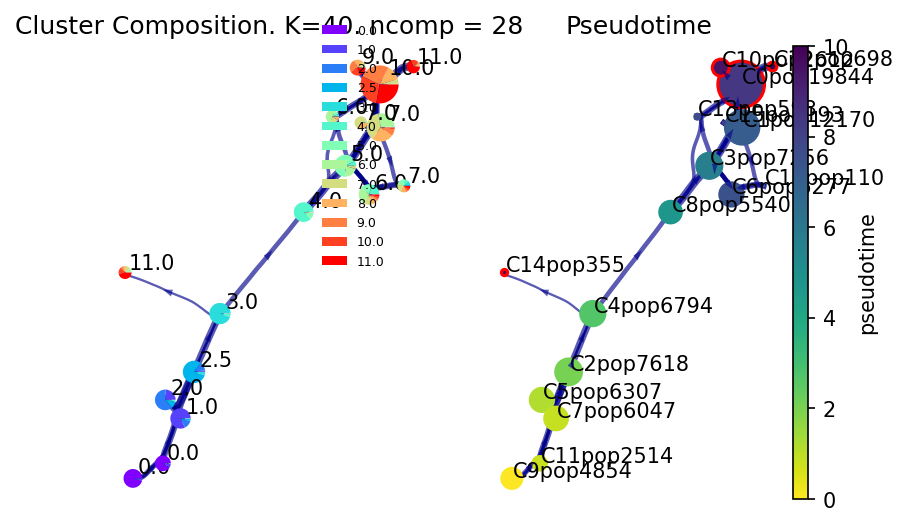

time elapsed 111.6 seconds


In [8]:
knn=40
cluster_graph_pruning_std = 0.15
jac_std_global=0.3
random_seed = 0
knn_sequential = 15
root = [0.0] #since the root corresponds to a group level initial state  we set dataset = 'group'
v0 = via.VIA(adata.X, true_label=true_labels_numeric, jac_std_global=jac_std_global, dist_std_local=1, knn=knn,
         cluster_graph_pruning_std=cluster_graph_pruning_std,  piegraph_arrow_head_width=0.6,
         too_big_factor=0.3, resolution_parameter=1,
         root_user=root, dataset='group', random_seed=random_seed,
         is_coarse=True, preserve_disconnected=False, pseudotime_threshold_TS=40, x_lazy=0.99,
         alpha_teleport=0.99, time_series=True, time_series_labels=true_labels_numeric, edgebundle_pruning=cluster_graph_pruning_std,
         edgebundle_pruning_twice=False, knn_sequential=knn_sequential)
v0.run_VIA()

### Protein Marker Dynamics
We expect the lineages associated with the differentiated mesoderm cells(Day 10/11 cells) to show an increase in *Cd44, gata4* and *pdgfra* and a decrease in *Epcam*

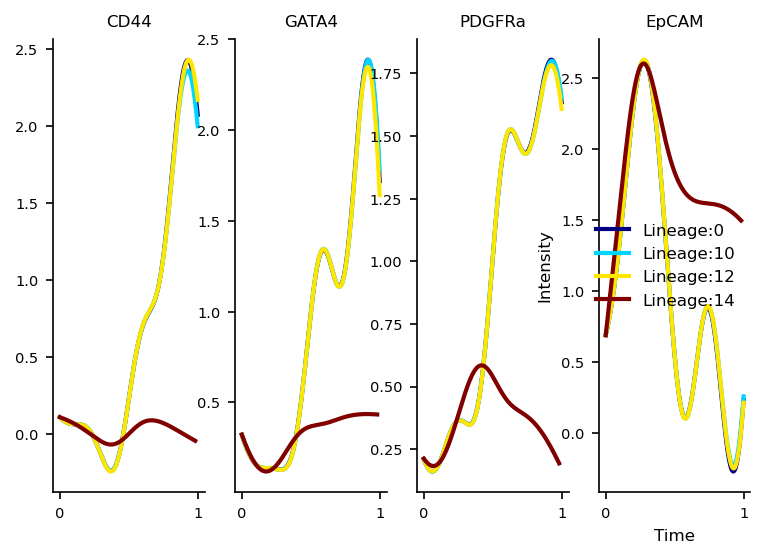

In [9]:
marker_genes = ['CD44', 'GATA4', 'PDGFRa', 'EpCAM']
df_genes = pd.DataFrame(adata[:, marker_genes].X)
df_genes.columns = marker_genes
v0.get_gene_expression(gene_exp=df_genes)
plt.show()

### Guiding the UMAP visualization 
We use the knn-graph constructed in VIA which incorporates the sequential information in order to generate a 2D embedding of the data

In [10]:
U = via.run_umap_hnsw(X_input=v0.data, graph=v0.csr_full_graph, n_components=2, spread=1.0, min_dist=0.3,
                  init_pos='spectral', random_state=1, n_epochs=150)


a,b, spread, dist 0.9921756197688717 1.1122533842193434 1.0 0.3


graph.data.size 4225254
graph.data.size 4225254 4225254


/home/shobi/anaconda3/envs/ViaEnv/lib/python3.7/site-packages/umap/spectral.py:317: RuntimeWarning: divide by zero encountered in true_divide
  1.0 / np.sqrt(diag_data), 0, graph.shape[0], graph.shape[0]


	completed  0  /  150 epochs


	completed  15  /  150 epochs


	completed  30  /  150 epochs


	completed  45  /  150 epochs


	completed  60  /  150 epochs


	completed  75  /  150 epochs


	completed  90  /  150 epochs


	completed  105  /  150 epochs


	completed  120  /  150 epochs


	completed  135  /  150 epochs


### Vector field plot
The cluster-level trajectory is projected onto the 2D embedding to visualize the more fine-grained progression

sizeT number of edges in sc graph 4225254


/home/shobi/anaconda3/envs/ViaEnv/lib/python3.7/site-packages/scipy/sparse/_index.py:124: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


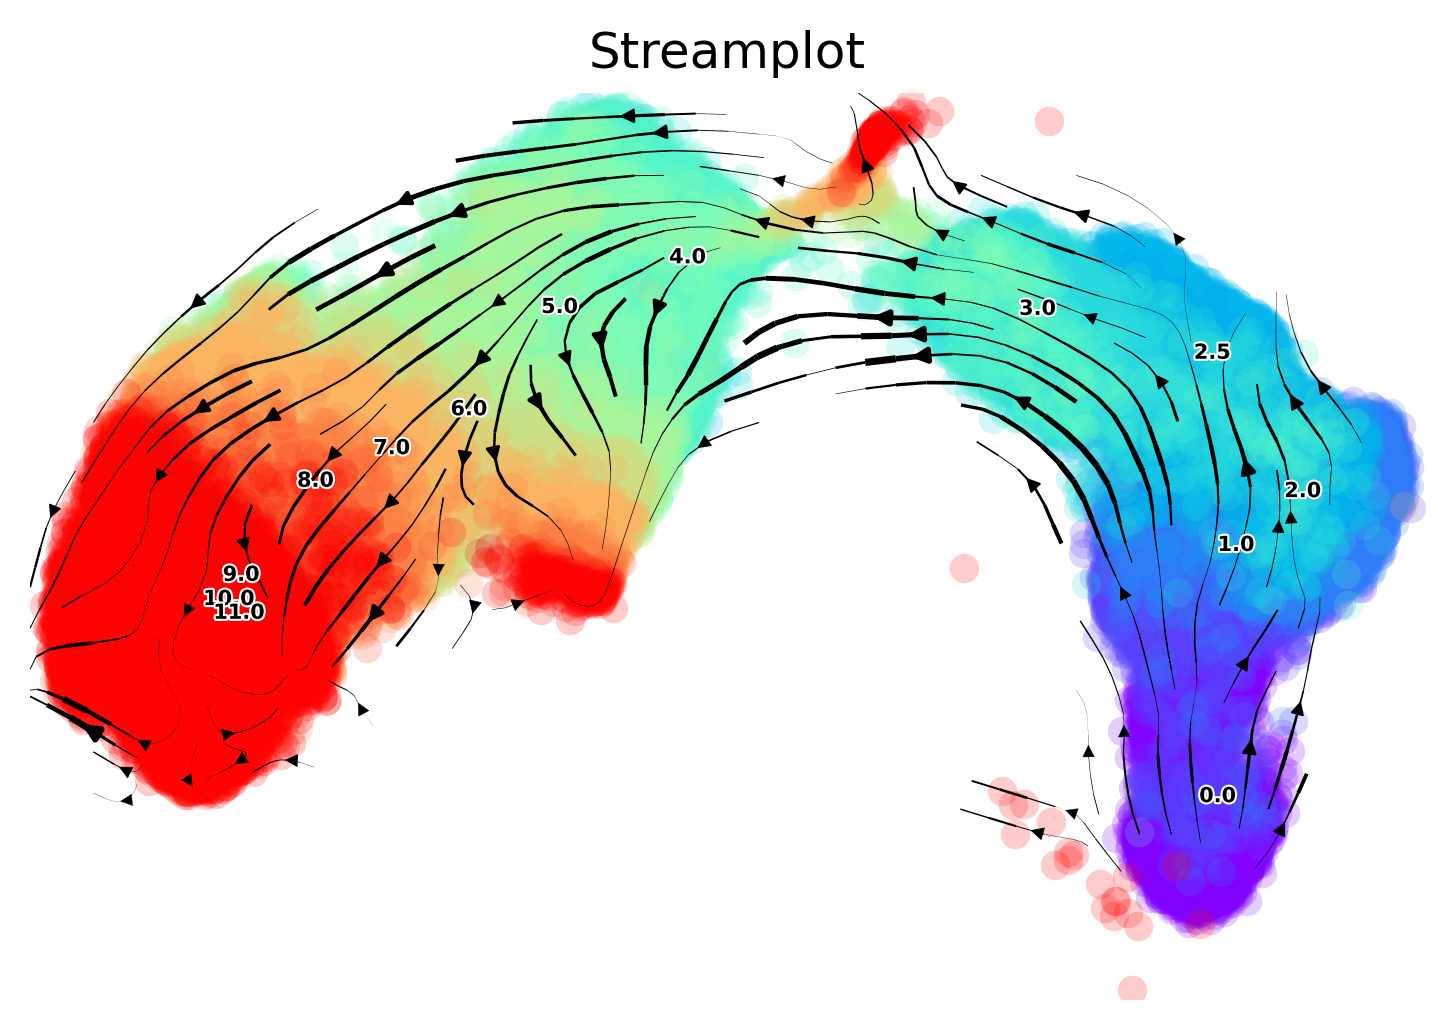

In [11]:
via_streamplot(v0, embedding=U[:, 0:2], scatter_size=50, scatter_alpha=0.2, marker_edgewidth=0.01,
                  density_stream=1.5, density_grid=0.5, smooth_transition=1, smooth_grid=0.3)
plt.show()


### Terminal states and pathways
The high-level direction from root to different final states is shown here. The final states are marked in yellow

dict of terminal state pairs, Super: sub:  {}


N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

super cluster 0 is a super terminal with sub_terminal cluster 0
super cluster 10 is a super terminal with sub_terminal cluster 10
super cluster 12 is a super terminal with sub_terminal cluster 12
super cluster 14 is a super terminal with sub_terminal cluster 14


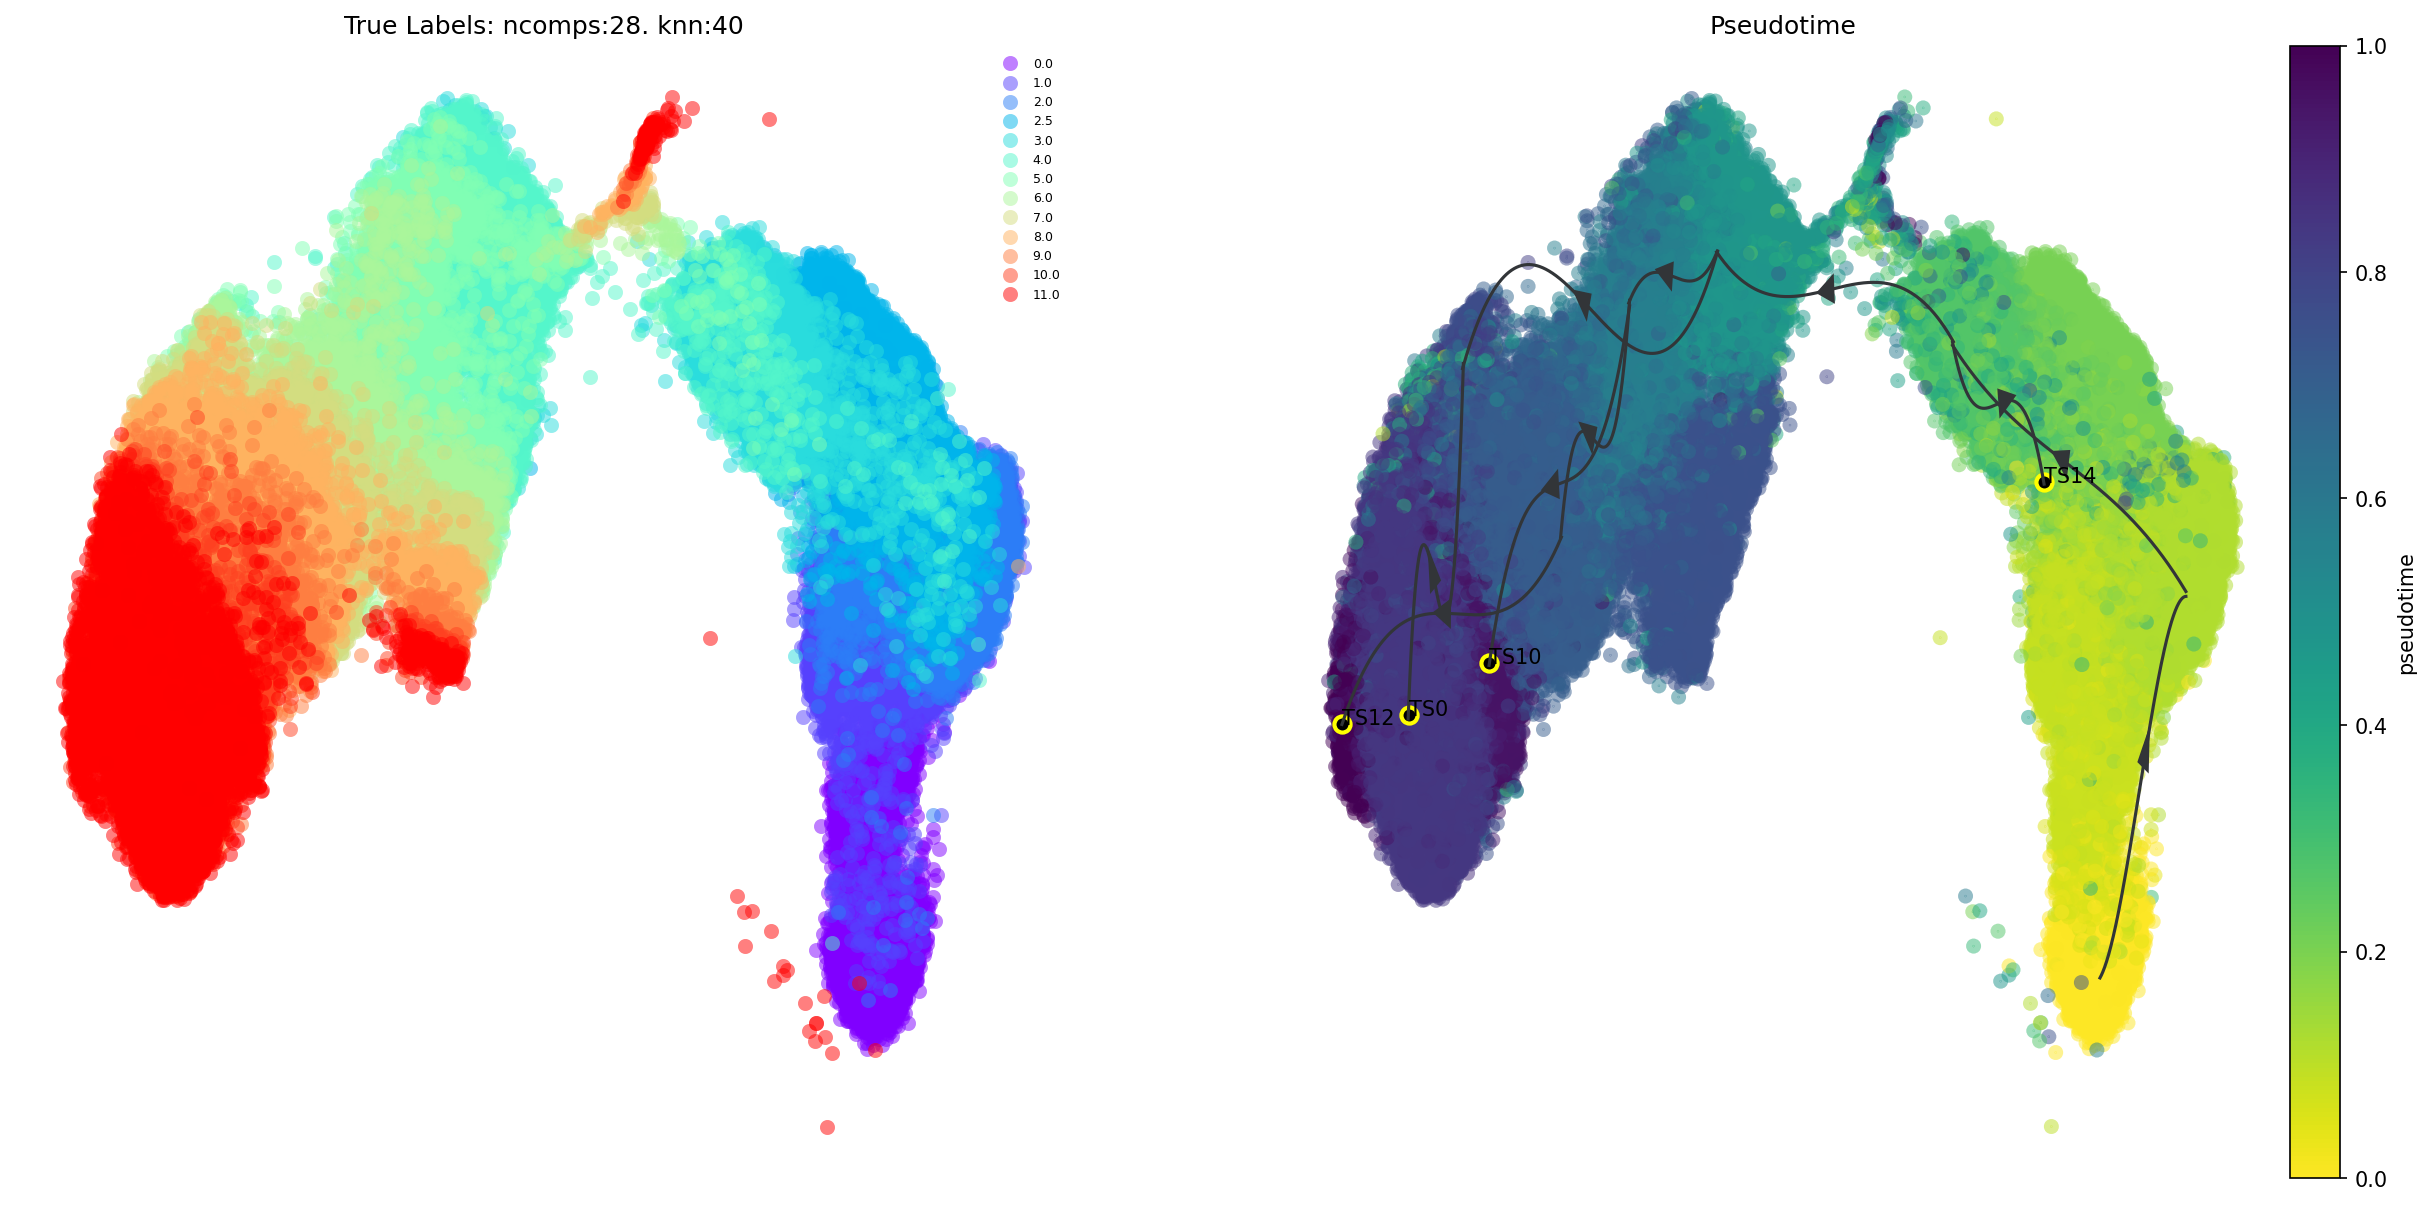

In [16]:
draw_trajectory_gams(via_coarse=v0, via_fine=v0, embedding=U, draw_all_curves=False)
plt.show()


### Plot the viagraph
This is the same graph that was output when running via. Note that the clusters circled in red correspond to the identified (predicted) terminal fates and since we know the time-samples, we can see they correspond to cells in the final stages of development from Day 10-11.

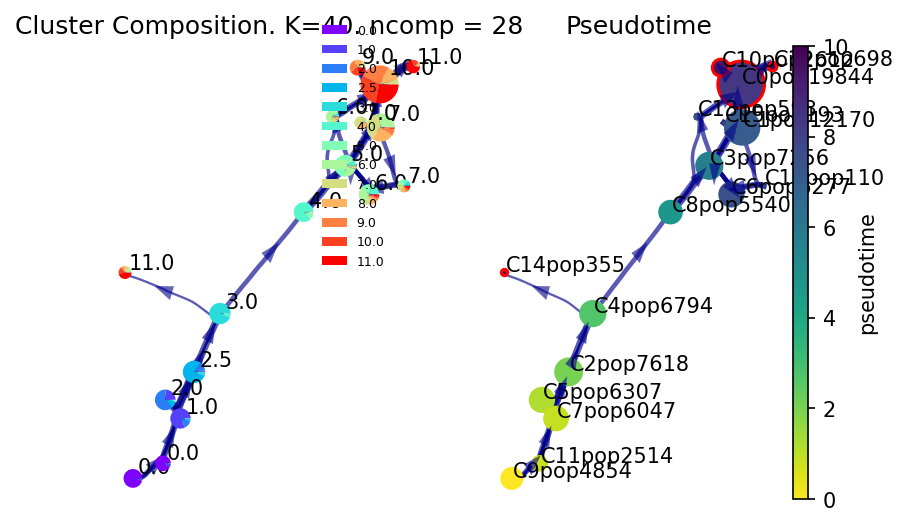

In [22]:
v0.draw_piechart_graph(headwidth_bundle=0.2)

### Animated Trajectory
Fine grained vector fields in action

sizeT number of edges in sc graph 4225254


/home/shobi/anaconda3/envs/ViaEnv/lib/python3.7/site-packages/scipy/sparse/_index.py:124: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


V_emb before grid in animation
[[ 0.801  2.01 ]
 [ 0.164  0.189]
 [ 0.146  0.306]
 ...
 [ 0.262  0.009]
 [-0.207  0.016]
 [-1.212  0.011]]
inside animated


  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

total number of stream lines 359


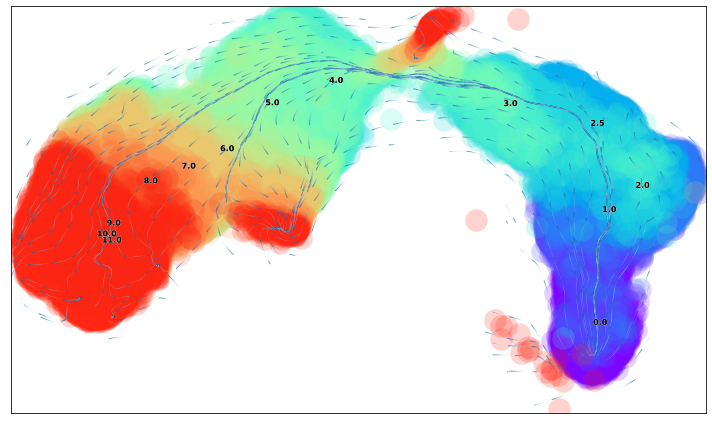

In [18]:
animated_streamplot(v0, embedding=U, saveto='.../filename.gif')

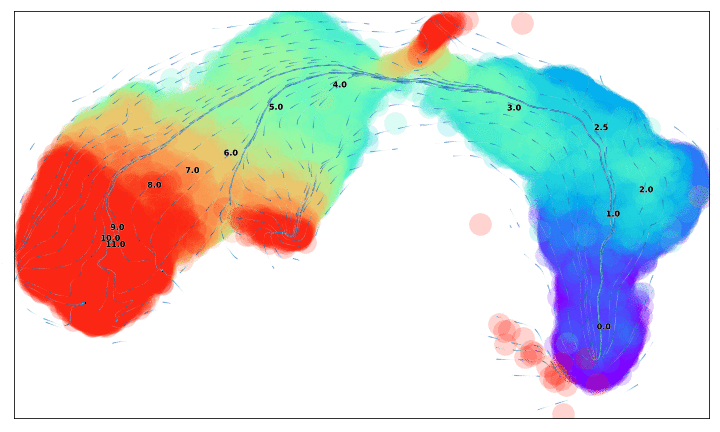

In [20]:
from IPython.display import Image
with open(".../mesc_timeseries.gif",'rb') as file:
    display(Image(file.read()))
